# Fill-Outline Invariance (FOI) Analysis

**Fill-outline invariance** (FOI) means that the unit is sensitive only to the boundary at a certain spatial orientation, and not to the fill (e.g. texture/color) of the object. For a perfectly invariant unit, its response $R(\cdot)$ should be the same given a hollow or filled closed shape. We will denote that as:

\begin{equation}
R(s_h) = R(s_f)
\end{equation}

The degree in which a unit is FOI is defined as its pearson correlation value.

In [31]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import handytools.visualizer as vis
import spectools.models.models as mdl
from spectools.models.calc import get_RF, get_RF_resnet
from spectools.stimulus.wyeth import get_stimulus
from spectools.responses import get_response_wrapper, get_drr_wrapper
from spectools.metrics.metrics import responsive
from spectools.models.models import AN_layer, VGG16b_layer, ResNet18_layer

In [33]:
def get_prs(R_fills, R_outlines, hkeys, verbose=False):
    prs = {}
    respdic = {}
    for hkey in hkeys:
        R_fill = R_fills[hkey]
        R_outline = R_outlines[hkey]

        prs[hkey] = np.array([])
        respdic[hkey] = []
        
        for unit in range(R_fill.shape[0]):
            resp = responsive(R_fill[unit]) and responsive(R_outline[unit])
            if resp:
                pr = np.corrcoef(R_fill[unit], R_outline[unit])[0][1]
                prs[hkey] = np.append(prs[hkey], pr)
                respdic[hkey].append(int(unit))
            else:
                prs[hkey] = np.append(prs[hkey], np.nan)
                if verbose: print(f"Layer {hkey}, unit {unit} not responsive!")
    return prs, respdic

def generate_boxplots(ax, X, Y):
    for i in range(len(Y)):
        row_data = Y[i]
        ax.boxplot(row_data, positions=[X[i]])

# Comparing FOI for different networks

Here we compare the FOI of all convolutional layers for three different networks: AlexNet, VGG16 and ResNet18.

In [34]:
# params
xn = 227
sz = 50
lw = 1.5
fg = 1.0
bg = 0.0

## For AlexNet

In [35]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

In [36]:
prs_an_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_an_foi[hkey][resp[hkey]].mean() for hkey in hkeys]
res2 = [prs_an_foi[hkey][resp[hkey]] for hkey in hkeys]

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(121)
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1")

ax2 = fig.add_subplot(122)
generate_boxplots(ax2, hkeys, res2)
ax2.set_xticklabels([AN_layer[hkey] for hkey in  hkeys], rotation=60)
ax2.set_xlabel("Layers")

plt.suptitle("FOI for AN"); plt.tight_layout(); #plt.show()
vis.savefig(f"foi_{mtype}.png", folders=["summary_230526"])

<Figure size 800x300 with 0 Axes>

## For VGG16

In [37]:
# params
hkeys = list(VGG16b_layer.keys())
mtype = "VGG16b"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

In [38]:
prs_vgg16_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_vgg16_foi[hkey][resp[hkey]].mean() for hkey in hkeys]
res2 = [prs_vgg16_foi[hkey][resp[hkey]] for hkey in hkeys]

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(121)
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16b_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1")

ax2 = fig.add_subplot(122)
generate_boxplots(ax2, hkeys, res2)
ax2.set_xticklabels([VGG16b_layer[hkey] for hkey in  hkeys], rotation=60)
ax2.set_xlabel("Layers")

plt.suptitle("FOI for VGG16"); plt.tight_layout(); #plt.show()
vis.savefig(f"foi_{mtype}.png", folders=["summary_230526"])

<Figure size 800x300 with 0 Axes>

## For ResNet18

In [39]:
# params
hkeys = list(ResNet18_layer.keys())
mtype = "ResNet18"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

In [40]:
prs_resnet18_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_resnet18_foi[hkey][resp[hkey]].mean() for hkey in hkeys]
res2 = [prs_resnet18_foi[hkey][resp[hkey]] for hkey in hkeys]

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(121)
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1")

ax2 = fig.add_subplot(122)
generate_boxplots(ax2, hkeys, res2)
ax2.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax2.set_xlabel("Layers")

plt.suptitle("FOI for Resnet18"); plt.tight_layout(); #plt.show()
vis.savefig(f"foi_{mtype}.png", folders=["summary_230526"])

<Figure size 800x300 with 0 Axes>

# Comparing On-Off Invariance (OOI) for different networks

If a unit is sensitive to shape and not fill, it is likely that it will also be insensitive to relative luminance (e.g. light image on dark background or vice versa). Here we compare FOI with OOI for AlexNet, VGG16 and ResNet18.

In [41]:
# params
xn = 227
sz = 50
lw = 1.5
bg = 0.0
fillflag = 1

verbose = False

## For AlexNet

In [42]:
# params
hkeys = list(AN_layer.keys())[:-3]
mtype = "AN"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

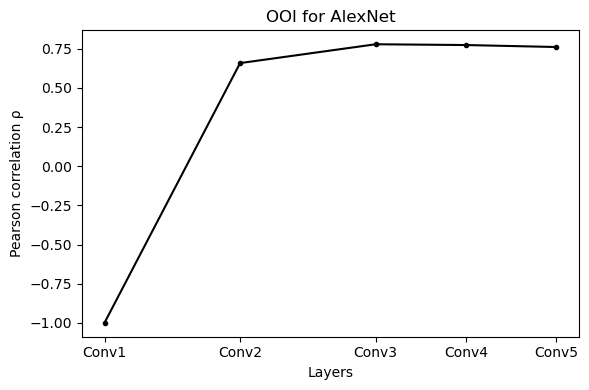

In [43]:
prs_an_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_an_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for AlexNet")
plt.tight_layout(); plt.show()

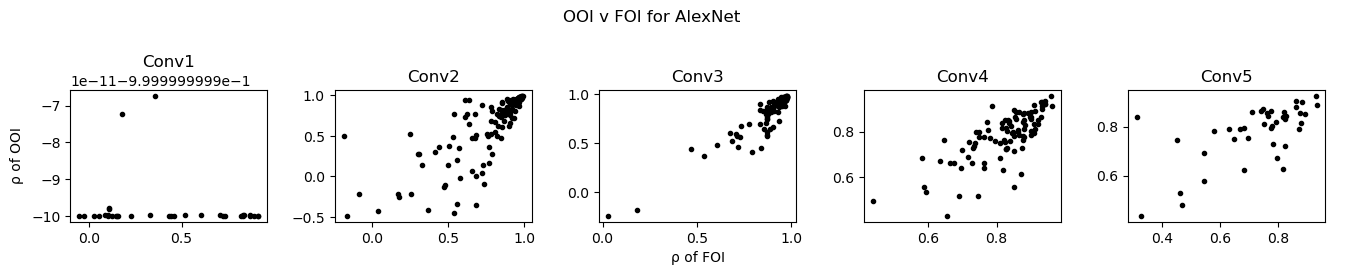

In [44]:
fig = plt.figure(figsize=(len(hkeys)*3 - 1, 3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(1, len(hkeys), i+1)
    ax.plot(prs_an_foi[hkey][resp[hkey]], prs_an_ooi[hkey][resp[hkey]], "k.")
    ax.set_title(AN_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for AlexNet")
plt.tight_layout(); plt.show()

## For VGG16

In [45]:
# params
hkeys = list(VGG16b_layer.keys())[:-3]
mtype = "VGG16b"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

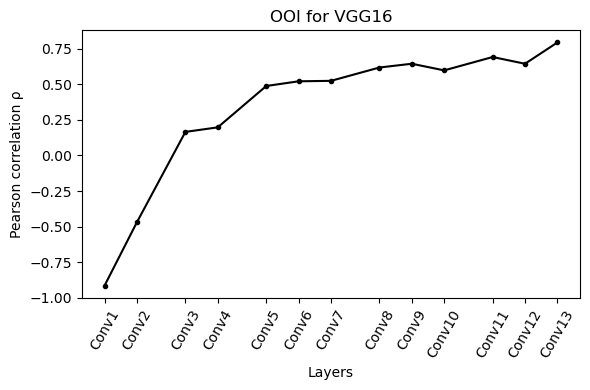

In [46]:
prs_vgg16_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_vgg16_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16b_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for VGG16")
plt.tight_layout(); plt.show()

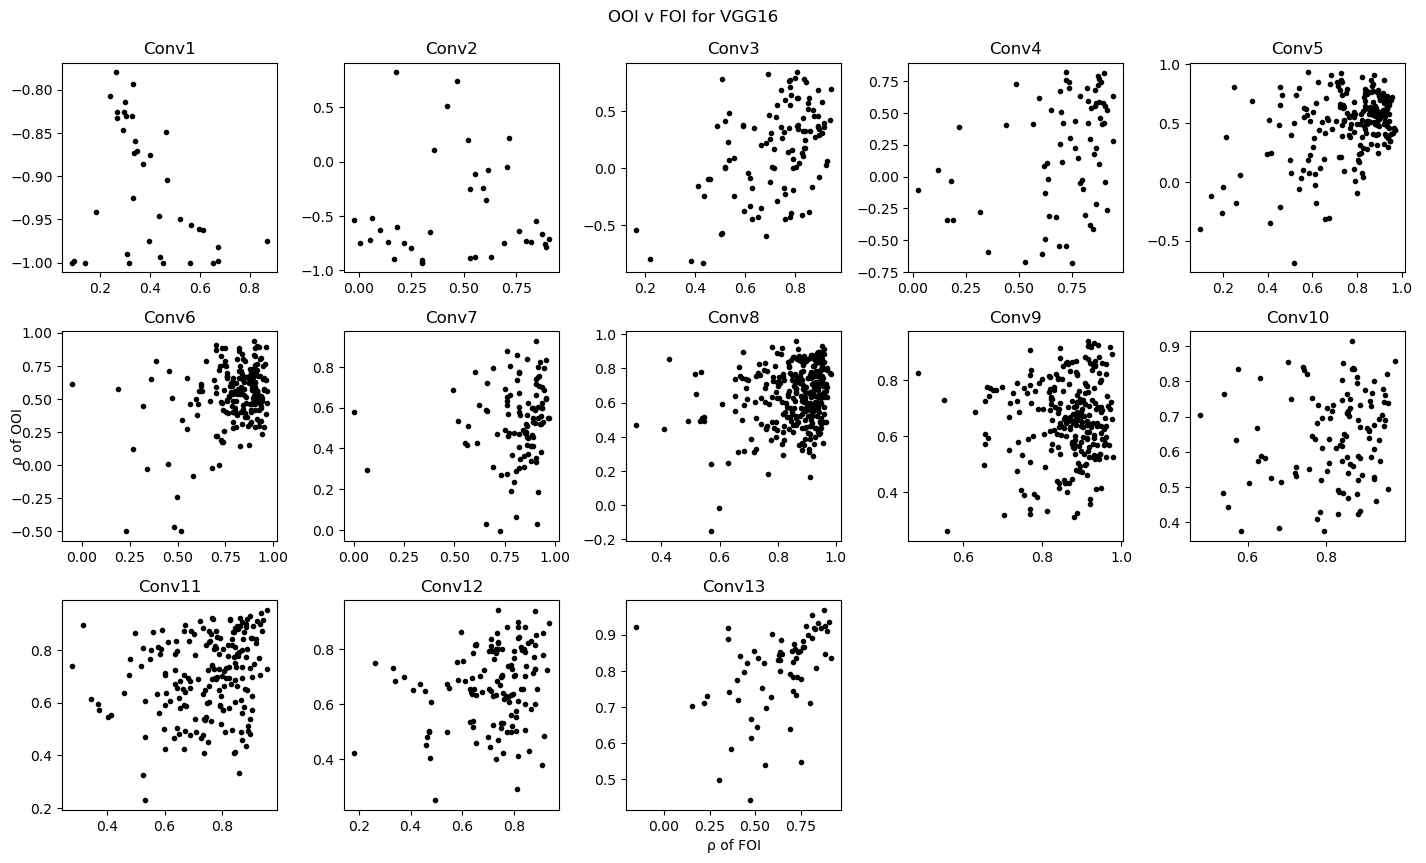

In [47]:
fig = plt.figure(figsize=(5*3, 3*3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(3, 5, i+1)
    ax.plot(prs_vgg16_foi[hkey], prs_vgg16_ooi[hkey], "k.")
    ax.set_title(VGG16b_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for VGG16")
plt.tight_layout(); plt.show()

## For ResNet18

In [48]:
# params
hkeys = list(ResNet18_layer.keys())[:-3]
mtype = "ResNet18"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

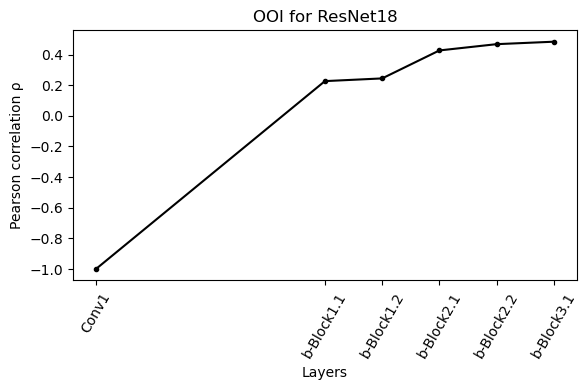

In [49]:
prs_resnet18_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_resnet18_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for ResNet18")
plt.tight_layout(); plt.show()

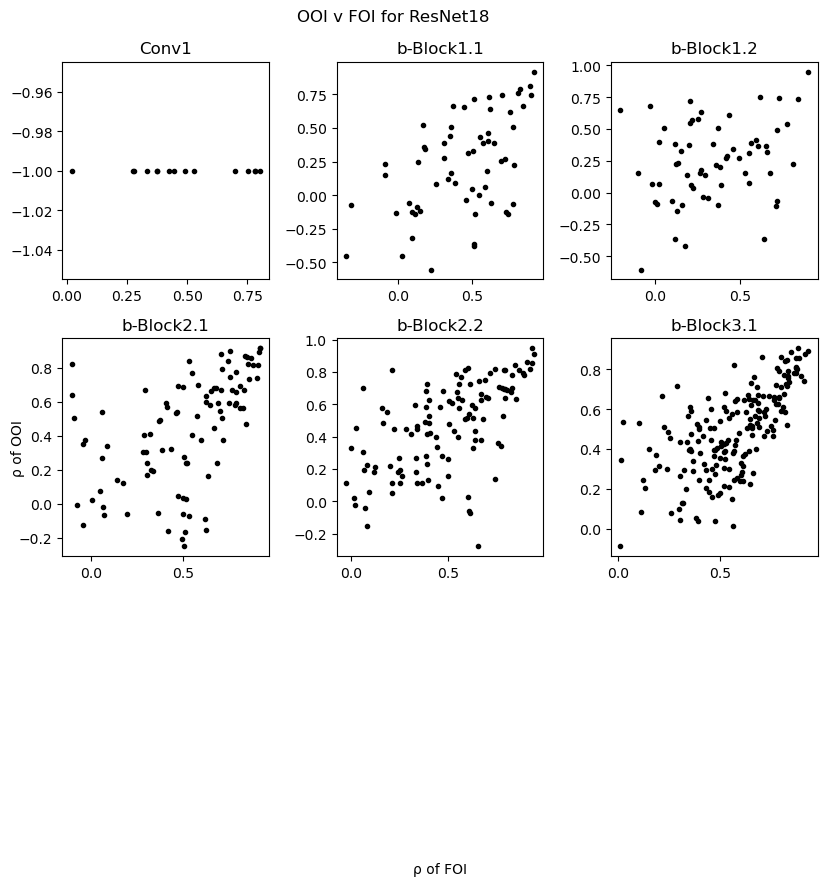

In [50]:
fig = plt.figure(figsize=(3*3, 3*3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(prs_resnet18_foi[hkey], prs_resnet18_ooi[hkey], "k.")
    ax.set_title(ResNet18_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for ResNet18")
plt.tight_layout(); plt.show()

# FOI v Receptive Field for different networks

To compare FOI across different networks, we plot it against different variables (e.g. receptive field size, layer depth).

In [51]:
def get_prs_wrap(mtype, hkeys):
    xn, sz, lw, fg, bg = 227, 50, 1.5, 1.0, 0.0

    # fill stimulus
    fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

    # outline stimulus
    outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

    prs, resp = get_prs(R_fills, R_outlines, hkeys)
    return prs, resp

In [55]:
device = "cuda:0"
color = vis.color_generator(["r", "g", "b", "m"])

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 2, 1)
for mtype in ["AN", "VGG16", "VGG16b"]:
    # load model, info and define parameters
    if mtype == "AN": mfunc = mdl.get_alexnet; ldic = mdl.AN_layer
    elif mtype == "VGG16": mfunc = mdl.get_vgg16; ldic = mdl.VGG16_layer
    elif mtype == "VGG16b": mfunc = mdl.get_vgg16b; ldic = mdl.VGG16b_layer
    hkeys = list(ldic.keys())[:-3]
    model = mfunc(hidden_keys=hkeys).to(device)

    # obtain rf, foi
    prs_an, resp_an = get_prs_wrap(mtype, hkeys)
    rfs = get_RF(model)
    foi = [prs_an[hkey][resp_an[hkey]].mean() for hkey in hkeys]
    maxrf = [rfs[hkey] for hkey in hkeys]

    if mtype == "VGG16b": label = "VGG16"
    elif mtype == "VGG16": label = "VGG11"
    else: label = mtype
    plt.plot(maxrf, foi, label=label, color=next(color), marker=".")
plt.ylim((0,1)); plt.legend()

hkeys = list(mdl.ResNet18_layer.keys())
model = mdl.get_resnet18(hidden_keys=hkeys)
prs_an, resp_an = get_prs_wrap("ResNet18", hkeys)
rfs = get_RF_resnet(model)
foi = [prs_an[hkey][resp_an[hkey]].mean() for hkey in hkeys]
maxrf = [rfs[hkey] for hkey in hkeys]
ax = fig.add_subplot(1, 2, 2)
plt.plot(maxrf, foi, label="ResNet18", color=next(color), marker=".")
plt.ylim((0,1)); plt.legend()

vis.common_label(fig, "Max. receptive field size (pixels)", "FOI")
plt.suptitle("FOI v maximum RF for different networks")
plt.tight_layout(); #plt.show()
vis.savefig("foi_v_maxrf.png", folders=["summary_230526"])

<Figure size 800x400 with 0 Axes>

In [53]:
AN_depth = {"Conv":{0: 0, 3:1, 6:2, 8:3, 10:4},
            "Pool":{0: 0, 1:1, 6:2, 8:2, 10:2},
            "ReLU":{0: 0, 3:1, 6:2, 8:3, 10:4}}
VGG16_depth = {"Conv":{0:0, 3:1, 6:2, 8:3, 11:4, 13:5, 16:6, 18:7},
                "Pool":{0:0, 3:1, 6:2, 8:2, 11:3, 13:3, 16:4, 18:4},
                "ReLU":{0:0, 3:1, 6:2, 8:3, 11:4, 13:5, 16:6, 18:7}}
VGG16b_depth = {"Conv":{0:0, 2:1, 5:2, 7:3, 10:4, 12:5, 14:6, 17:7, 19:8, 21:9, 24:10, 26:11, 28:12},
                "Pool":{0:0, 2:0, 5:1, 7:1, 10:2, 12:2, 14:2, 17:3, 19:3, 21:3, 24:4, 26:4, 28:4},
                "ReLU":{0:0, 2:1, 5:2, 7:3, 10:4, 12:5, 14:6, 17:7, 19:8, 21:9, 24:10, 26:11, 28:12}}
ResNet18_depth = {"Conv":{0:0, 4:3, 5:5, 6:7, 7:9, 8:11, 9:13, 10:15, 11:17},
                  "Pool":{0:0, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1},
                  "ReLU":{0:0, 4:2, 5:3, 6:4, 7:5, 8:6, 9:7, 10:8, 11:9}}

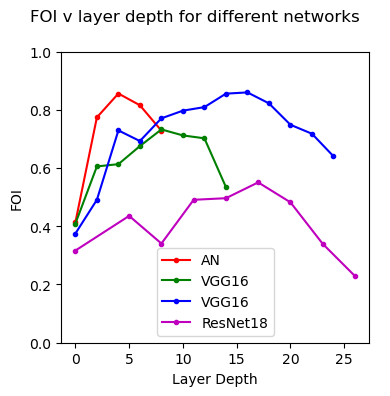

In [54]:
device = "cuda:0"
color = vis.color_generator(["r", "g", "b", "m"])

fig = plt.figure(figsize=(4,4))
for mtype in ["AN", "VGG16", "VGG16b"]:
    # load model, info and define parameters
    if mtype == "AN": mfunc = mdl.get_alexnet; ldic = mdl.AN_layer; ddic = AN_depth
    elif mtype == "VGG16": mfunc = mdl.get_vgg16; ldic = mdl.VGG16_layer; ddic = VGG16_depth
    elif mtype == "VGG16b": mfunc = mdl.get_vgg16b; ldic = mdl.VGG16b_layer; ddic = VGG16b_depth
    hkeys = list(ldic.keys())[:-3]
    model = mfunc(hidden_keys=hkeys).to(device)

    # obtain rf, foi
    prs_an, resp_an = get_prs_wrap(mtype, hkeys)
    rfs = get_RF(model)
    foi = [prs_an[hkey][resp_an[hkey]].mean() for hkey in hkeys]
    maxdp = [ddic["Conv"][hkey] + ddic["ReLU"][hkey] for hkey in hkeys]

    label = "VGG11" if mtype == "VGG16" else mtype
    label = "VGG16" if mtype == "VGG16b" else mtype
    plt.plot(maxdp, foi, label=label, color=next(color), marker=".")

hkeys = list(mdl.ResNet18_layer.keys())
model = mdl.get_resnet18(hidden_keys=hkeys)
ddic = ResNet18_depth
prs_an, resp_an = get_prs_wrap("ResNet18", hkeys)
rfs = get_RF_resnet(model)
foi = [prs_an[hkey][resp_an[hkey]].mean() for hkey in hkeys]
maxdp = [ddic["Conv"][hkey] + ddic["ReLU"][hkey] for hkey in hkeys]
plt.plot(maxdp, foi, label="ResNet18", color=next(color), marker=".")
plt.ylim((0,1)); plt.legend()

vis.common_label(fig, "Layer Depth", "FOI")
plt.suptitle("FOI v layer depth for different networks")
plt.tight_layout(); plt.show()

# Dynamic Range Metric (DRI) for different networks (Unfinished)

In [ ]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

fname = lambda hkey: f"imgnettecr_hkey={hkey}.npy"
R_an_drm = get_drr_wrapper(hkeys, fname, mtype=mtype)

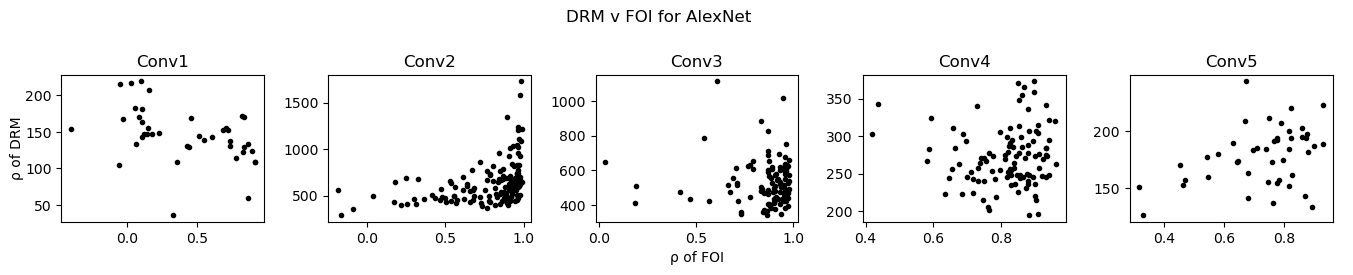

In [ ]:
prs_an_drm = {}
for hkey in hkeys:
    prs_an_drm[hkey] = R_an_drm[hkey].std(axis=1) #/ np.absolute(R_an_drm[hkey].mean(axis=1))

fig = plt.figure(figsize=(len(hkeys)*3 - 1, 3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(1, len(hkeys), i+1)
    ax.plot(prs_an_foi[hkey], prs_an_drm[hkey], "k.")
    ax.set_title(AN_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of DRM")
plt.suptitle("DRM v FOI for AlexNet")
plt.tight_layout(); plt.show()